In [1]:
## Import the necessary libraries:-


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

from pandas import factorize
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering,DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import (confusion_matrix, accuracy_score, recall_score,classification_report,
                             precision_score,roc_auc_score,f1_score,mean_absolute_error)
from sklearn.metrics import r2_score,mean_squared_error
import pickle
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA

In [2]:
## Load the dataset using pandas:

df = pd.read_csv(r"F:\Ineuron DS\Assignment\rideshare_kaggle.csv")

In [69]:
## Checking top 5 rows

df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [70]:
## Checking Details Information related with Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [71]:
## Checking Null Values

df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [72]:
## Checking Rows & Columns Availabale in Dataset

df.shape

(693071, 57)

In [73]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [3]:
# Droping ID column

# We want to prodict the price and location so we Remove the following features 
# Because it has no effect on the price of the trip


drop = ['id','timestamp','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'
                 ,'latitude','longitude','product_id','surge_multiplier']

df.drop(drop,axis = 1,inplace = True)

In [5]:
df.shape

(693071, 39)

In [76]:
df.head(2)

,hour,day,month,datetime,timezone,source,destination,cab_type,name,price,distance,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureHighTime,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,42.34,37.12,Mostly Cloudy,0.0000,0.0,0.68,8.66,9.17,10.000,43.68,1544968800,34.19,37.95,27.39,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,43.58,37.35,Rain,0.1299,1.0,0.94,11.98,11.98,4.786,47.30,1543251600,42.10,43.92,36.20,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92


In [4]:
# Droping Datetime since 2018 is the only year 

df.drop('datetime',axis = 1,inplace = True)

In [5]:
# Droping timezone since Newyork is the only zone 

df.drop('timezone',axis = 1,inplace = True)

In [6]:
# Removing all the temperature related features from the dataframe as 
# they have very weak correlation with the price and source 

temp_drop = ['price','temperature','apparentTemperature','temperatureHigh',
             'temperatureLow','apparentTemperatureHigh','apparentTemperatureLow',
             'temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
             'apparentTemperatureMax']

temp = df[temp_drop]

corr_price = temp.corr()[['price']]
corr_price

,price
price,1.000000
temperature,-0.000084
apparentTemperature,-0.000193
temperatureHigh,-0.000516
temperatureLow,0.000182
apparentTemperatureHigh,-0.000261
apparentTemperatureLow,0.000831
temperatureMin,-0.000428
temperatureHighTime,0.000759
temperatureMax,-0.000550


<Axes: >

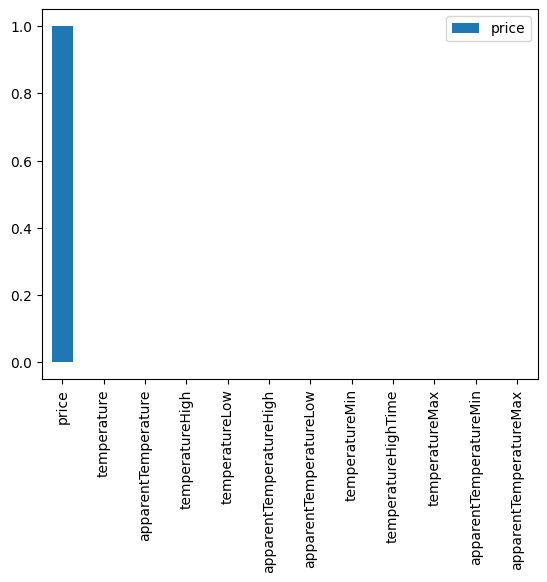

In [7]:
price_corr=corr_price[(corr_price['price']>0.00001)|(corr_price['price']<-0.00001)] 
price_corr.plot.bar() 

In [8]:
# Factorizing source 

labels,categories = pd.factorize(df['source'])

df['source_labels'] = labels

In [9]:
temp_drop = ['source_labels','temperature','apparentTemperature','temperatureHigh',
             'temperatureLow','apparentTemperatureHigh','apparentTemperatureLow',
             'temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
             'apparentTemperatureMax']

temp = df[temp_drop]

corr_source = temp.corr()[['source_labels']]
corr_source

,source_labels
source_labels,1.000000
temperature,-0.000135
apparentTemperature,-0.000073
temperatureHigh,-0.000734
temperatureLow,-0.004291
apparentTemperatureHigh,-0.000859
apparentTemperatureLow,-0.003730
temperatureMin,0.000282
temperatureHighTime,-0.001482
temperatureMax,-0.000496


<Axes: >

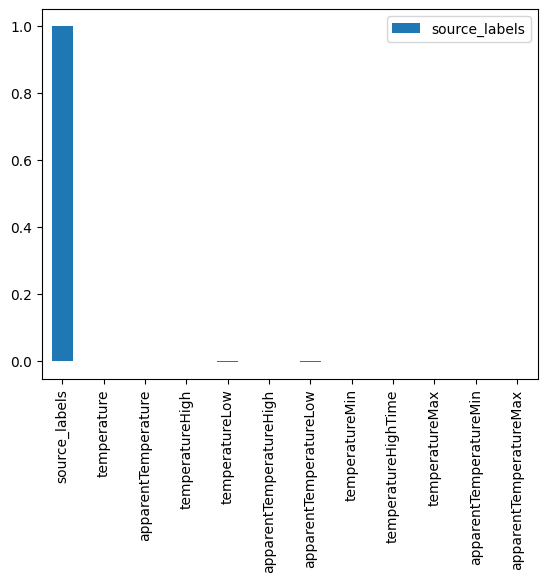

In [10]:
src_corr=corr_source[(corr_source['source_labels']>0.00001)|(corr_source['source_labels']<-0.00001)] 
src_corr.plot.bar() 

In [11]:
df.drop(temp_drop[1:],axis = 1,inplace = True)

In [12]:
# correlation b/t climate and target feature

climate_drop = ['price','precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax']

cli = df[climate_drop]

corr_price = cli.corr()[['price']]
corr_price

,price
price,1.000000
precipIntensity,0.000166
precipProbability,-0.000243
humidity,-0.001238
windSpeed,0.000990
windGust,0.001218
visibility,0.001497
dewPoint,-0.000615
pressure,0.000866
windBearing,-0.001382


<Axes: >

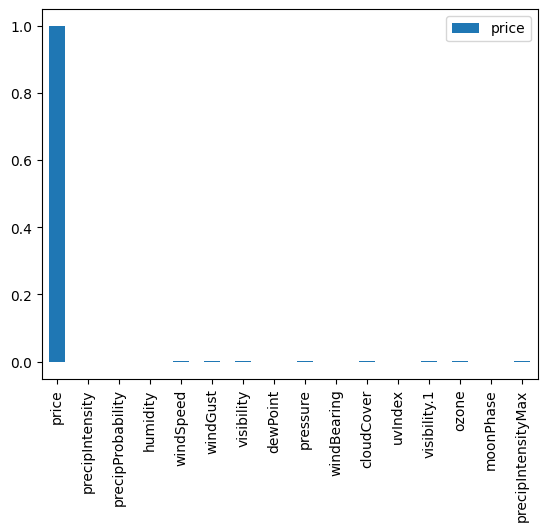

In [13]:
price_corr=corr_price[(corr_price['price']>0.00001)|(corr_price['price']<-0.00001)] 
price_corr.plot.bar() 

In [14]:
climate_drop = ['source_labels','precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax']

cli = df[climate_drop]

corr_src = cli.corr()[['source_labels']]
corr_src

,source_labels
source_labels,1.000000
precipIntensity,-0.002162
precipProbability,-0.002915
humidity,-0.001998
windSpeed,-0.000596
windGust,-0.000423
visibility,0.001632
dewPoint,-0.001183
pressure,-0.002042
windBearing,0.001479


<Axes: >

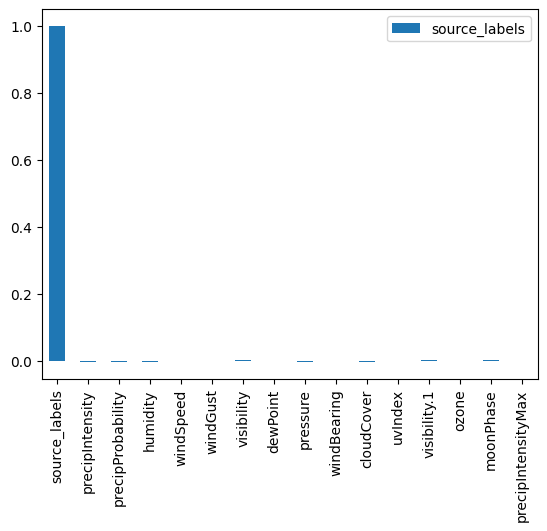

In [15]:
price_corr=corr_src[(corr_src['source_labels']>0.00001)|(corr_src['source_labels']<-0.00001)] 
price_corr.plot.bar() 

In [16]:
df.drop(climate_drop[1:],axis = 1,inplace = True)

In [17]:
df.drop('source',axis = 1,inplace = True)

<Axes: >

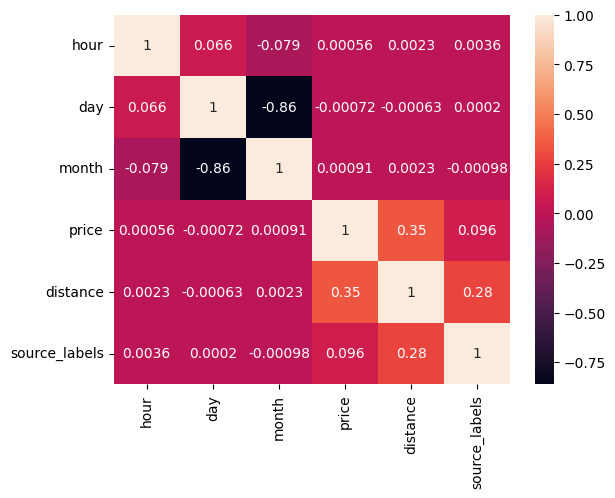

In [18]:
## correlation b/t price and source  -- very low 

sns.heatmap(df.corr(),annot = True)



In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   hour           693071 non-null  int64  
 1   day            693071 non-null  int64  
 2   month          693071 non-null  int64  
 3   destination    693071 non-null  object 
 4   cab_type       693071 non-null  object 
 5   name           693071 non-null  object 
 6   price          637976 non-null  float64
 7   distance       693071 non-null  float64
 8   short_summary  693071 non-null  object 
 9   icon           693071 non-null  object 
 10  source_labels  693071 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 58.2+ MB


In [19]:
# numerical and categorical features

numerical_features =[i  for i in df.columns if df[i].dtype != 'O' and i not in ['price','source_labels']]

categorical_features = [i  for i in df.columns if df[i].dtype == 'O' ]

In [20]:
numerical_features

['hour', 'day', 'month', 'distance']

In [21]:
categorical_features

['destination', 'cab_type', 'name', 'short_summary', 'icon']

In [22]:
index = df[df['price'].isnull()==True].index
index.values

array([    18,     31,     40, ..., 693049, 693060, 693068], dtype=int64)

In [23]:
# almost 8% of data - Price has missing values 

df.drop(index=index.values,inplace=True)

In [24]:
df[df['price'].isnull()==True]

,hour,day,month,destination,cab_type,name,price,distance,short_summary,icon,source_labels


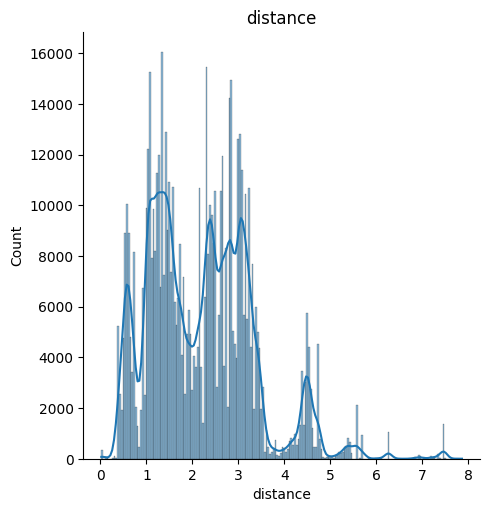

In [99]:
# Distribution of numerical features 


sns.displot(df['distance'],kde = True)
plt.title('distance')
plt.show()

In [27]:
# outliers 

per_75 = df['distance'].quantile(0.75)
per_25 = df['distance'].quantile(0.25)
iqr = per_75 - per_25

upper_limit = per_75 + 1.5 *(iqr)
lower_limit = per_25 + 1.5*(iqr)

outlier = len(df) - len(df[(df['distance']>upper_limit) | (df['distance'] < lower_limit)]) 

print(f"{'distance'} has {round((outlier/len(df))*100,3)}% of outliers")

distance has 6.428% of outliers


In [101]:
# log transformation 

df['d'] = df['distance']



In [102]:
df['d'] = np.cbrt(df['d'])

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='d', ylabel='Density'>

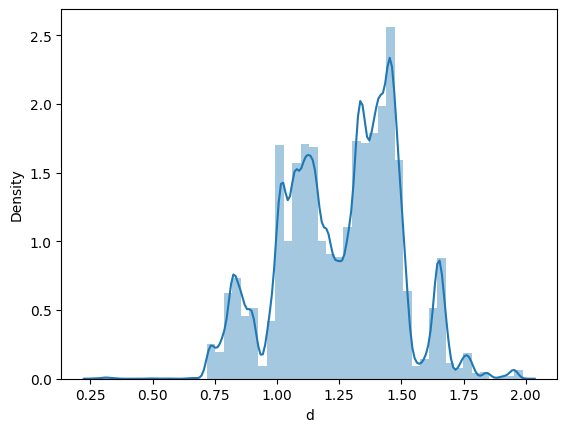

In [103]:
sns.distplot(df['d'])

In [104]:
per_75 = df['d'].quantile(0.75)
per_25 = df['d'].quantile(0.25)
iqr = per_75 - per_25

upper_limit = per_75 + 1.5 *(iqr)
lower_limit = per_25 + 1.5*(iqr)

outlier = len(df) - len(df[(df['d']>upper_limit) | (df['d'] < lower_limit)]) 

print(f"{'d'} has {round((outlier/len(df))*100,3)}% of outliers")

d has 6.677% of outliers


In [105]:
# Dependent and Independent Features -- Target as price

X = df.drop(['price'],axis = 1)
y = df['price']

# Train Test Split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Label Encoder 

label_encoder = preprocessing.LabelEncoder()

for i in categorical_features:
    X_train[i] = label_encoder.fit_transform(X_train[i])
    X_test[i] = label_encoder.transform(X_test[i])
    
    
# Standardization

scalar = preprocessing.StandardScaler()

for i in X:
    train_feature = np.array(X_train[i]).reshape(-1,1)
    test_feature = np.array(X_test[i]).reshape(-1,1)
    
    train_feature_scaled = scalar.fit_transform(train_feature)
    test_feature_scaled = scalar.transform(test_feature)
    
    X_train[i] = train_feature_scaled.reshape(-1)
    X_test[i] = test_feature_scaled.reshape(-1)
    
y_train = scalar.fit_transform(np.array(y_train).reshape(-1,1))
y_test = scalar.fit_transform(np.array(y_test).reshape(-1,1))

In [106]:
y_train.ravel()

array([ 0.15681041,  1.01540228, -0.00417556, ..., -0.86276743,
       -1.45304934,  0.63976834])

In [44]:
# Model training 


models = {"Linear Regression" : LinearRegression(),
          "Decision Tree": DecisionTreeRegressor(),
          "Random Forest": RandomForestRegressor(),
          "knn" : KNeighborsRegressor()
            }



params= {"Decision Tree": 
        {
        #'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'max_depth':[2,4,6],
        'min_samples_split':[2,4,6],
        'random_state' : [32]
        },
        
        "Random Forest":
        {
          #'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
           'n_estimators': [100,112,124,143,156],
           'min_samples_split':[2,4,6],
           'random_state':[42],
           'max_depth':[4,5,2]
        },
 
        "Linear Regression":{},
 
         "knn":{
             'n_neighbors':[5,10,12,15]
         }
}

In [45]:
def evaluate_model(X_train,X_test,y_train,y_test,models,params):
    try:

        report = {}
        final_model = {}

        for i in models:
            mod_el = models[i]
            
            model = GridSearchCV(mod_el,cv = 5, param_grid = params[i])

            model.fit(X_train,y_train.ravel())
            
            y_train_pred = model.predict(X_train)

            y_test_pred = model.predict(X_test)

            train_model_score = r2_score(y_train,y_train_pred)

            test_model_score = r2_score(y_test,y_test_pred)

            report[i] = [train_model_score,test_model_score]
            
            final_model[i] = model

        return report,final_model
    
    except Exception as e :
        print(e)

In [46]:
model_report,final_model = evaluate_model(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,
                                             models=models,params=params)

In [47]:
model_report

{'Linear Regression': [0.47061055556556985, 0.47273683023370205],
 'Decision Tree': [0.9105063669171418, 0.9097013441834907],
 'Random Forest': [0.8773125030063981, 0.876701878289546],
 'knn': [0.8849136454303473, 0.8125472030580644]}

In [63]:
scores = pd.DataFrame.from_dict(model_report, orient='index')

model_score = scores[scores[1] == max(scores[1])][1].values[0]

best_model = scores[scores[1] == max(scores[1])].index[0]

model_config = final_model[best_model]


In [1]:
scores = pd.DataFrame.from_dict(model_report, orient='index')

NameError: name 'pd' is not defined

In [64]:
print(best_model)
print(model_score)

Decision Tree
0.9097013441834907
